<a href="https://colab.research.google.com/github/macr/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [2]:
!pip install pandas==0.23.4

In [3]:
# TODO
import pandas as pd
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None,  names = ['age', 'op_year', 'pos_ax_nodes', 'survived'])
df.head(10)


,age,op_year,pos_ax_nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [4]:
df.shape

(306, 4)

In [5]:
df.isnull().sum()

age             0
op_year         0
pos_ax_nodes    0
survived        0
dtype: int64

In [6]:
df['survived'] = df['survived'].apply(lambda x: int(x == 1))
df.head(10)

,age,op_year,pos_ax_nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [7]:
df.dtypes

age             int64
op_year         int64
pos_ax_nodes    int64
survived        int64
dtype: object

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [8]:
# TODO
df.describe()

,age,op_year,pos_ax_nodes,survived
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [9]:
df.corr()

,age,op_year,pos_ax_nodes,survived
age,1.000000,0.089529,-0.063176,-0.067950
op_year,0.089529,1.000000,-0.003764,0.004768
pos_ax_nodes,-0.063176,-0.003764,1.000000,-0.286768
survived,-0.067950,0.004768,-0.286768,1.000000


In [10]:
age_bins = pd.cut(df['age'], 5)
year_bins = pd.cut(df['op_year'], 5)
node_bins = pd.cut(df['pos_ax_nodes'], 5)
pd.crosstab(node_bins, [df['survived'], age_bins], normalize='index')

survived                    0                                         \
age            (29.947, 40.6] (40.6, 51.2] (51.2, 61.8] (61.8, 72.4]   
pos_ax_nodes                                                           
(-0.052, 10.4]       0.011278     0.082707     0.071429     0.041353   
(10.4, 20.8]         0.000000     0.230769     0.192308     0.153846   
(20.8, 31.2]         0.090909     0.181818     0.181818     0.090909   
(31.2, 41.6]         0.000000     0.000000     1.000000     0.000000   
(41.6, 52.0]         0.000000     0.500000     0.000000     0.000000   

survived                                 1                            \
age            (72.4, 83.0] (29.947, 40.6] (40.6, 51.2] (51.2, 61.8]   
pos_ax_nodes                                                           
(-0.052, 10.4]     0.011278       0.131579     0.236842     0.240602   
(10.4, 20.8]       0.000000       0.115385     0.192308     0.076923   
(20.8, 31.2]       0.000000       0.090909     0.000000     0.181818   
(31.2, 41.6]       0.000000       0.000000     0.000000     0.000000   
(41.6, 52.0]       0.000000       0.000000     0.000000     0.500000   

survived                                  
age            (61.8, 72.4] (72.4, 83.0]  
pos_ax_nodes                              
(-0.052, 10.4]     0.150376     0.022556  
(10.4, 20.8]       0.038462     0.000000  
(20.8, 31.2]       0.181818     0.000000  
(31.2, 41.6]       0.000000     0.000000  
(41.6, 52.0]       0.000000     0.000000

In [11]:
pd.crosstab(node_bins, [df['survived'], age_bins])

survived                    0                                         \
age            (29.947, 40.6] (40.6, 51.2] (51.2, 61.8] (61.8, 72.4]   
pos_ax_nodes                                                           
(-0.052, 10.4]              3           22           19           11   
(10.4, 20.8]                0            6            5            4   
(20.8, 31.2]                1            2            2            1   
(31.2, 41.6]                0            0            1            0   
(41.6, 52.0]                0            1            0            0   

survived                                 1                            \
age            (72.4, 83.0] (29.947, 40.6] (40.6, 51.2] (51.2, 61.8]   
pos_ax_nodes                                                           
(-0.052, 10.4]            3             35           63           64   
(10.4, 20.8]              0              3            5            2   
(20.8, 31.2]              0              1            0            2   
(31.2, 41.6]              0              0            0            0   
(41.6, 52.0]              0              0            0            1   

survived                                  
age            (61.8, 72.4] (72.4, 83.0]  
pos_ax_nodes                              
(-0.052, 10.4]           40            6  
(10.4, 20.8]              1            0  
(20.8, 31.2]              2            0  
(31.2, 41.6]              0            0  
(41.6, 52.0]              0            0

In [0]:
import seaborn as sns

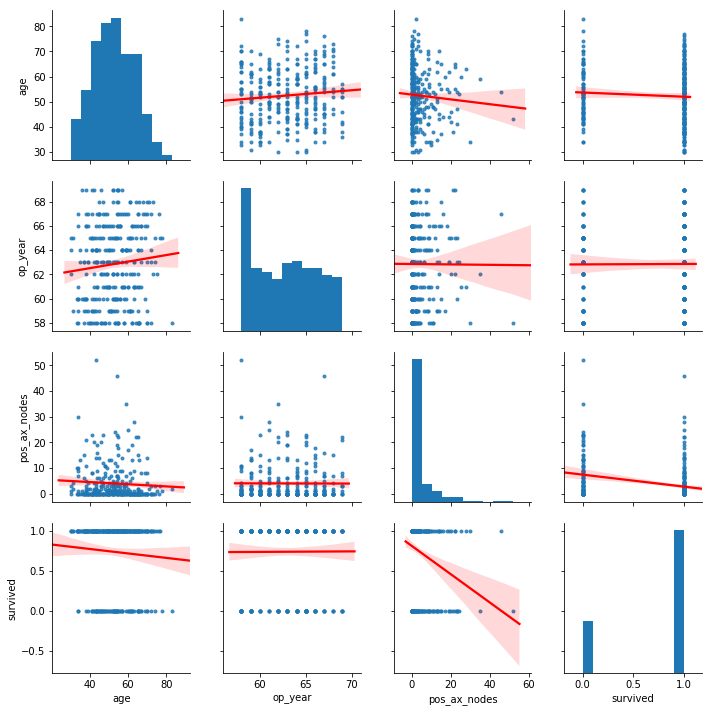

In [13]:
graph = sns.pairplot(df, markers='.', kind='reg', plot_kws={'line_kws':{'color':'red'}})

In [14]:

df['age_bins'] = age_bins
df['year_bins'] = year_bins
df['node_bins'] = node_bins
df.head()

,age,op_year,pos_ax_nodes,survived,age_bins,year_bins,node_bins
0,30,64,1,1,"(29.947, 40.6]","(62.4, 64.6]","(-0.052, 10.4]"
1,30,62,3,1,"(29.947, 40.6]","(60.2, 62.4]","(-0.052, 10.4]"
2,30,65,0,1,"(29.947, 40.6]","(64.6, 66.8]","(-0.052, 10.4]"
3,31,59,2,1,"(29.947, 40.6]","(57.989, 60.2]","(-0.052, 10.4]"
4,31,65,4,1,"(29.947, 40.6]","(64.6, 66.8]","(-0.052, 10.4]"


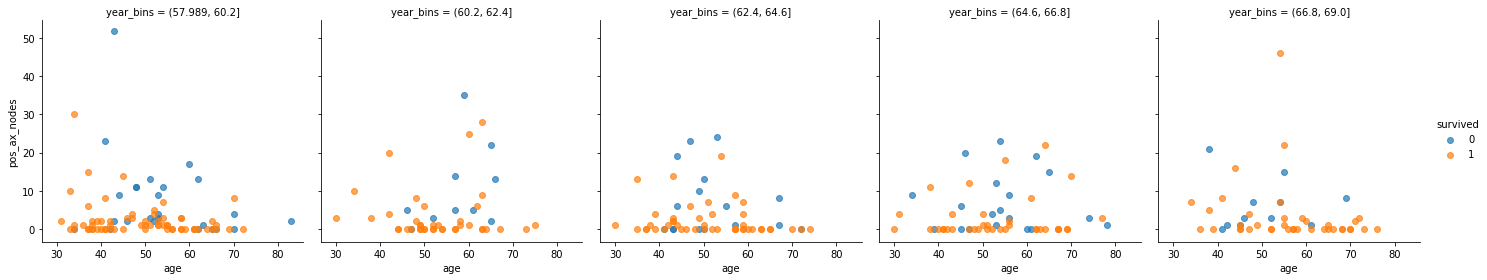

In [15]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col="year_bins", hue="survived", height=4)
g.map(plt.scatter, "age", "pos_ax_nodes", alpha=.7)
g.add_legend();


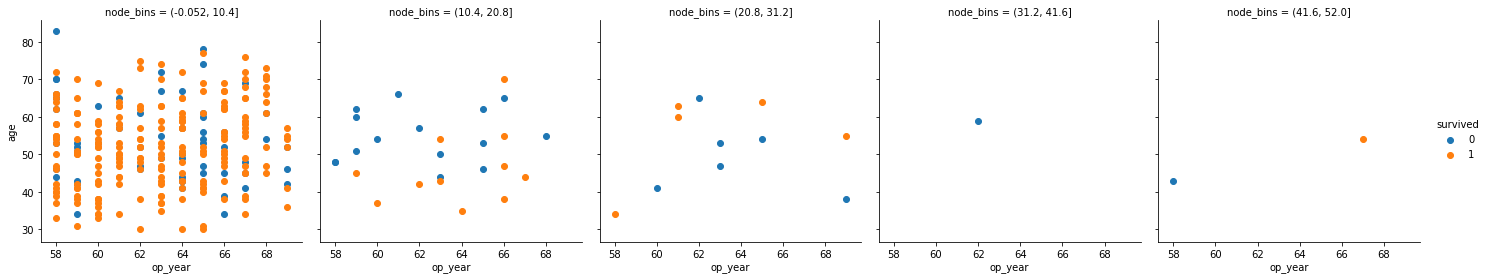

In [16]:
g = sns.FacetGrid(df, col="node_bins",  hue='survived', height=4)
g.map(plt.scatter, 'op_year', 'age')
g.add_legend();

In [17]:
age_qbins = pd.qcut(df['age'], 5)
year_qbins = pd.qcut(df['op_year'], 5)
node_qbins = pd.qcut(df['pos_ax_nodes'], 5, duplicates='drop')
df['age_qbins'] = age_qbins
df['year_qbins'] = year_qbins
df['node_qbins'] = node_qbins
df.head()

,age,op_year,pos_ax_nodes,survived,age_bins,year_bins,node_bins,age_qbins,year_qbins,node_qbins
0,30,64,1,1,"(29.947, 40.6]","(62.4, 64.6]","(-0.052, 10.4]","(29.999, 42.0]","(62.0, 64.0]","(-0.001, 2.0]"
1,30,62,3,1,"(29.947, 40.6]","(60.2, 62.4]","(-0.052, 10.4]","(29.999, 42.0]","(59.0, 62.0]","(2.0, 7.0]"
2,30,65,0,1,"(29.947, 40.6]","(64.6, 66.8]","(-0.052, 10.4]","(29.999, 42.0]","(64.0, 66.0]","(-0.001, 2.0]"
3,31,59,2,1,"(29.947, 40.6]","(57.989, 60.2]","(-0.052, 10.4]","(29.999, 42.0]","(57.999, 59.0]","(-0.001, 2.0]"
4,31,65,4,1,"(29.947, 40.6]","(64.6, 66.8]","(-0.052, 10.4]","(29.999, 42.0]","(64.0, 66.0]","(2.0, 7.0]"


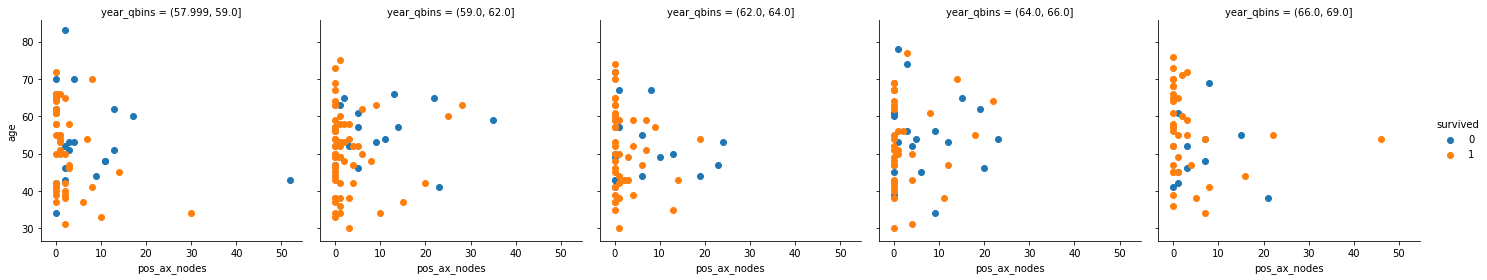

In [18]:
g = sns.FacetGrid(df, col="year_qbins",  hue='survived', height=4)
g.map(plt.scatter, 'pos_ax_nodes', 'age')
g.add_legend();

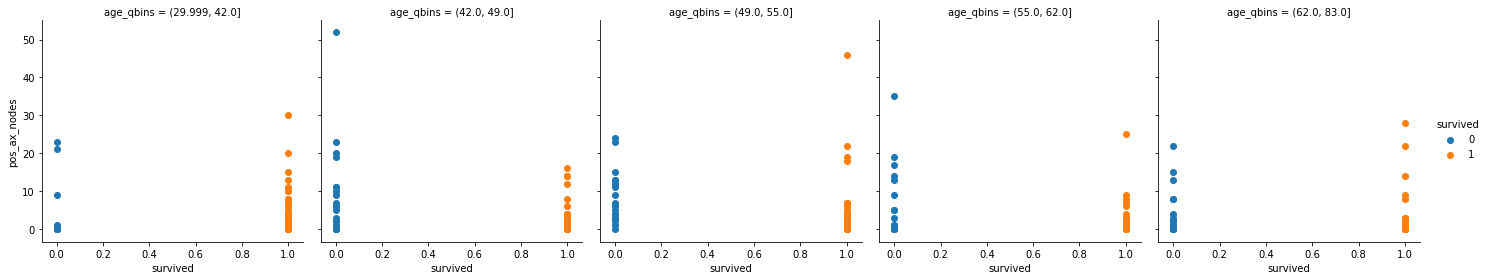

In [19]:
g = sns.FacetGrid(df, col="age_qbins",  hue='survived', height=4)
g.map(plt.scatter, 'survived', 'pos_ax_nodes')
g.add_legend();

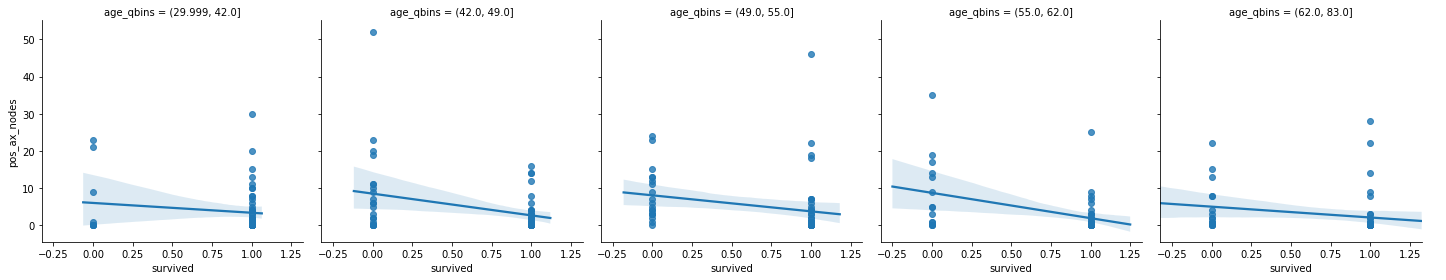

In [33]:
g = sns.FacetGrid(df, col="age_qbins",  height=4)
g.map(sns.regplot, 'survived', 'pos_ax_nodes')
g.add_legend();

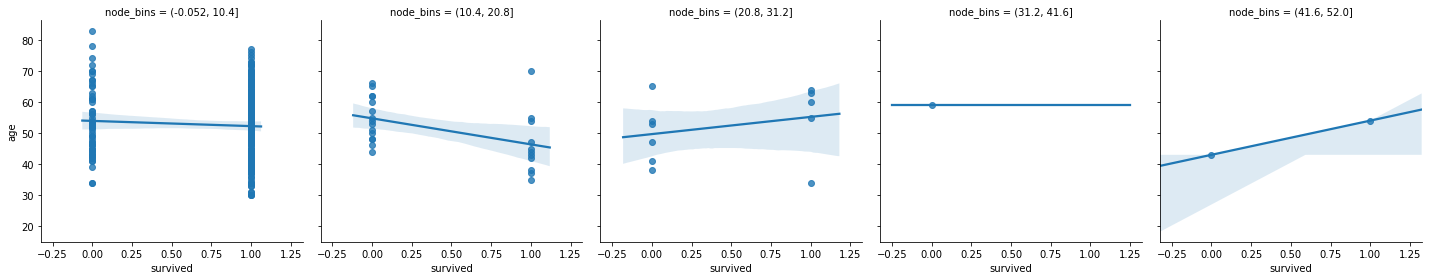

In [21]:
g = sns.FacetGrid(df, col="node_bins",  height=4)
g.map(sns.regplot, 'survived', 'age')
g.add_legend();
#very low sample towards the end

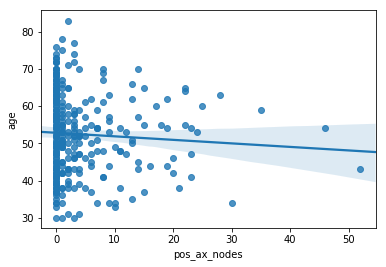

In [24]:
sns.regplot( df['pos_ax_nodes'], df['age']);

In [26]:
from scipy import stats
import numpy as np
x = df['pos_ax_nodes']
y = df['age']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('slope %s'% slope)
print('intercept %s'% intercept)
print('p_value %s'% p_value)
print('r_value %s'% r_value)
print('std_err %s'% std_err)


slope -0.0949308629671422
intercept 52.83972164436444
p_value 0.27058847128545666
r_value -0.06317610238980059
std_err 0.08601008791823703


In [30]:

x = df['survived']
y = df['pos_ax_nodes']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('slope %s'% slope)
print('intercept %s'% intercept)
print('p_value %s'% p_value)
print('r_value %s'% r_value)
print('std_err %s'% std_err)

slope -4.665679012345663
intercept 7.456790123456779
p_value 3.3353851166604965e-07
r_value -0.28676756711841994
std_err 0.893950822328858


In [31]:
x = df['survived']
y = df['age']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('slope %s'% slope)
print('intercept %s'% intercept)
print('p_value %s'% p_value)
print('r_value %s'% r_value)
print('std_err %s'% std_err)

slope -1.6612345679012304
intercept 53.679012345679006
p_value 0.23595785126829646
r_value -0.06795032439910388
std_err 1.3989354935683658


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

  ** Patient's year of operation**

- What is at least one feature that looks to have a negative relationship with survival?
  
  ** Age, and number of postive nodes.**
- How are those two features related with each other, and what might that mean?

** While both shows positive correlations to survival, there is negative but not statistically significant realationship between the 2. This implies that the relationship of each of them (age and number of positive nodes) to survival is independent of each other.
** 

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.